## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.io import DataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [27]:
size_df = 1000
noise = 'vhigh'
data.sample_params_from_prior(size_df)

In [28]:
if noise == 'low':
    sigma = 1
if noise == 'medium':
    sigma = 5
if noise == 'high':
    sigma = 10
if noise == 'vhigh':
    sigma = 100
data.simulate_data(data.params,
                   sigma, 
                   'linear_homogeneous'
                    )

Linear simulation data generated.


Let's take a look at this simulated dataset.

In [29]:
print(np.shape(data.output[0]))
data.output

torch.Size([101])


tensor([[ -77.1627,  -73.6816,  -32.7200,  ...,  557.4213,  681.1451,
          551.3296],
        [  84.9311,  -65.7436,  110.6138,  ...,  764.4362,  405.1001,
          715.5713],
        [  -2.7125, -218.1783,  -22.0956,  ...,  202.6475,  228.7246,
          290.5823],
        ...,
        [-140.5541,  -88.2000,   83.9046,  ...,  874.5598,  737.9090,
          732.8196],
        [-148.2634,  129.0917,   46.4582,  ...,  490.3686,  690.4188,
          840.1964],
        [ -68.2536,  -87.1549, -107.5169,  ...,  350.8577,  242.9037,
          334.4130]])

In [30]:
data.params

tensor([[ 6.4016, -5.9236],
        [ 6.0677,  9.5545],
        [ 2.4352,  1.7378],
        ...,
        [ 7.4975, -7.0616],
        [ 6.9664,  2.7561],
        [ 3.2406,  1.6741]])

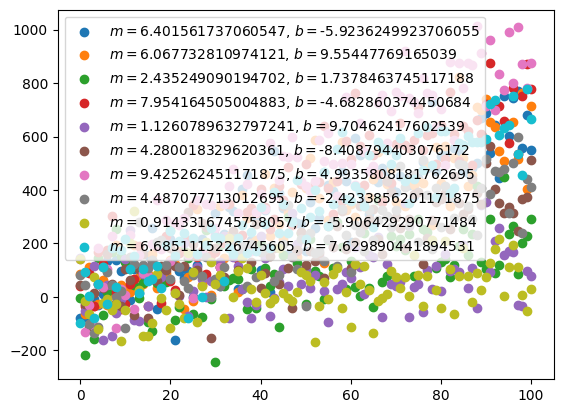

In [31]:
plt.clf()
for i in range(10):
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0].numpy()}, $b = ${data.params[i][1].numpy()}')
plt.legend()
plt.show()
    

In [32]:
# now make it into a dataframe
dict = data.get_dict()
dict

{'params': tensor([[ 6.4016, -5.9236],
         [ 6.0677,  9.5545],
         [ 2.4352,  1.7378],
         ...,
         [ 7.4975, -7.0616],
         [ 6.9664,  2.7561],
         [ 3.2406,  1.6741]]),
 'inputs': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 'output': tensor([[ -77.1627,  -73.6816,  -32.7200,  ...,  557.4213,  681.1451,
           551.3296],

## Save the data to h5

In [33]:
saver = DataLoader()

In [34]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_sigma_'+str(sigma)+'_size_'+str(size_df), dict)